In [14]:
import numpy as np
from modules.markovChainModule import markovChain
from modules.autocorrelation import autoCorrelation
from modules.constantsAndVectors import hValueses, criticalPoint
from modules.utilityFunctions import stackList, powerLaw, plotMomentScaling, stackList
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
import mpl_interactions.ipyplot as iplt
from scipy.stats import linregress
import pandas as pd


In [15]:
dataPath: str = '/Users/tommaso/Desktop/masterThesis/data/nullH/nullHShortLineagesConverged/'


In [16]:
autoCorrParameters = pd.read_csv(
    dataPath + 'correlationParameters.csv')
markovChain.all = []
markovChain.instantiateFromNpy(
    dataPath + 'timeSerieses.npy', log=True)
meanSizesAtBirth = [instance.meanSizeAtBirth() for instance in markovChain.all]


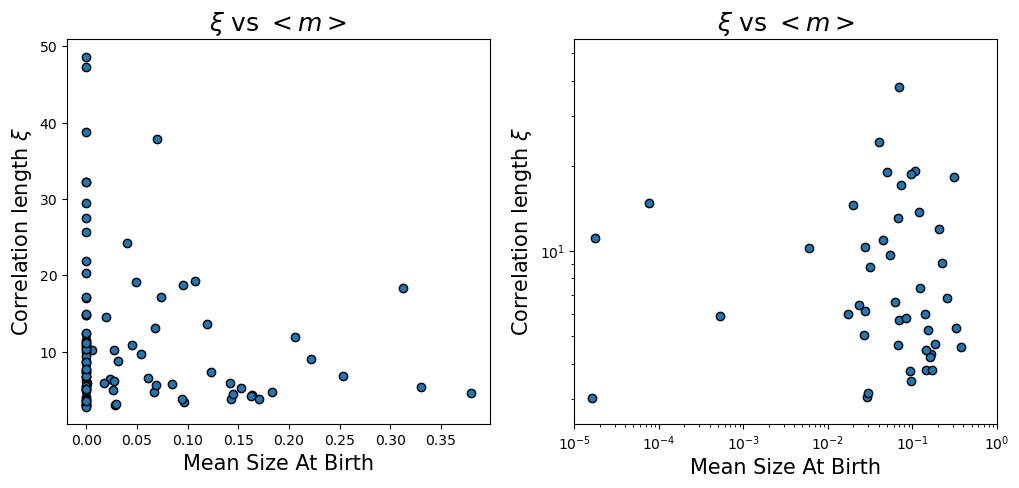

In [17]:
fig, ax_ = plt.subplots(1, 2, figsize=(12, 5))
for ax, scale in zip(ax_.flatten(), ['linear', 'log']):
    ax.scatter(meanSizesAtBirth,
               autoCorrParameters['correlation'], edgecolor='black')
    ax.set_xlabel('Mean Size At Birth', fontsize=15)
    ax.set_ylabel('Correlation length $\\xi$', fontsize=15)
    ax.set_title('$\\xi$ vs $<m>$', fontsize=18)
    ax.set_xscale(scale)
    _ = ax.set_yscale(scale)

# xAxis = np.logspace(-1, -3.5)
# ax_[1].plot(xAxis, powerLaw(xAxis, .2, -2), color='firebrick',
# linewidth=2.5, label='$slope = -2$ curve')

_ = ax_[1].set_xlim(left=1e-5, right=1)

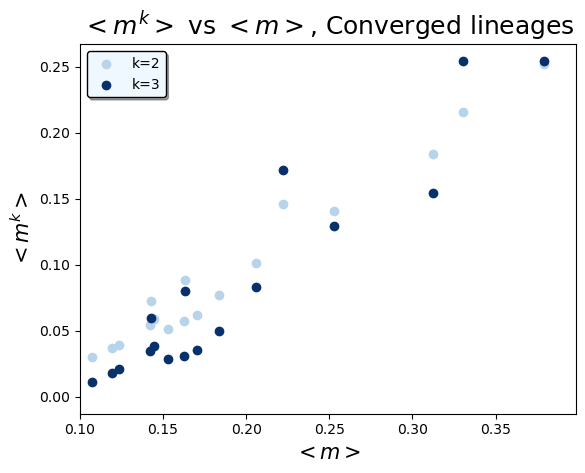

In [30]:
sizesPath = '/Users/tommaso/Desktop/masterThesis/data/nullH/nullHShortLineagesConverged/'
allMeans = np.load(dataPath + 'allMeans.npy')
correlationsParameters = pd.read_csv(dataPath + 'correlationParameters.csv')
plotMomentScaling(sizesPath=sizesPath,
                  title='$<m^k>$ vs $<m>$, Converged lineages', maxK=3)
_ = plt.xlim(left = .1)

## Positive H


In [19]:
dataPath = '/Users/tommaso/Desktop/masterThesis/data/positiveH/absorbingHDeltaDecidingShort/'


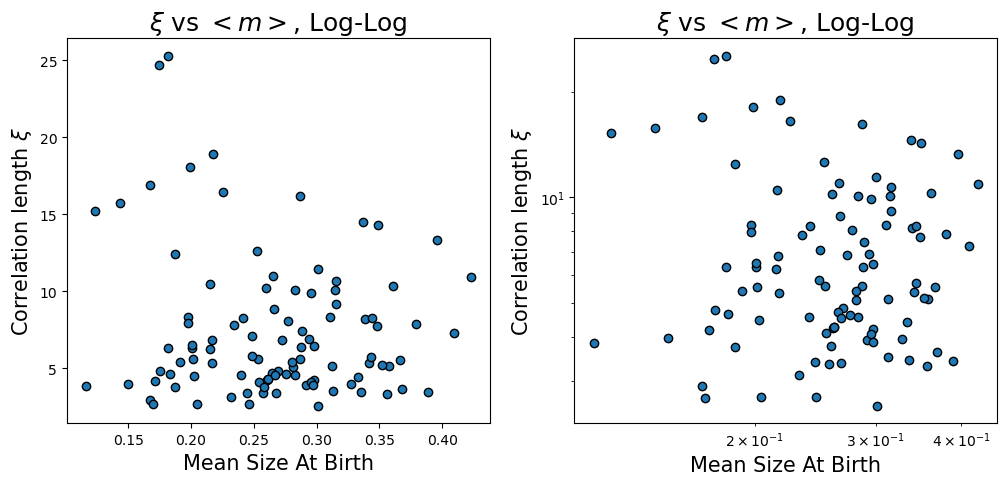

In [20]:
correlationsParameters = pd.read_csv(dataPath + 'correlationParameters.csv')
allMeans = np.load(dataPath + 'allMeans.npy')
allMoments = np.load(dataPath + 'allMoments.npy')
fig, ax_ = plt.subplots(1, 2, figsize=(12, 5))
for ax, scale in zip(ax_.flatten(), ['linear', 'log']):
    ax.scatter(allMeans[0, :],
               correlationsParameters['correlation'], edgecolor='black')
    ax.set_xlabel('Mean Size At Birth', fontsize=15)
    ax.set_ylabel('Correlation length $\\xi$', fontsize=15)
    ax.set_title('$\\xi$ vs $<m>$, Log-Log', fontsize=18)
    ax.set_xscale(scale)
    _ = ax.set_yscale(scale)

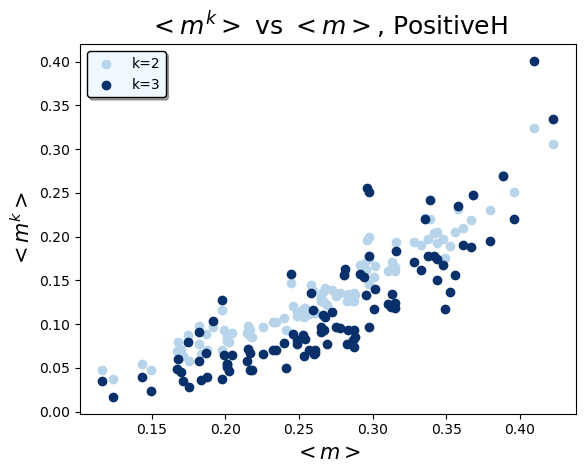

In [21]:
plotMomentScaling(sizesPath=dataPath,
                  title='$<m^k>$ vs $<m>$, PositiveH', maxK=3)

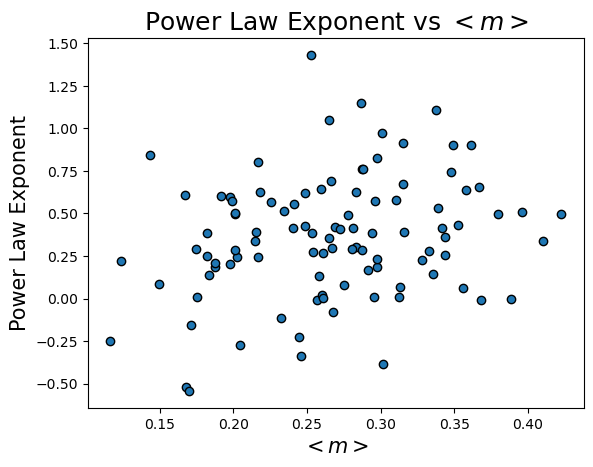

In [22]:
plt.scatter(allMeans[0, :],
            correlationsParameters['exponent'], edgecolor='black')
plt.xlabel('$<m>$', fontsize=15)
plt.ylabel('Power Law Exponent', fontsize=15)
_ = plt.title('Power Law Exponent vs $<m>$', fontsize=18)

## Long simulation


In [23]:
dataPath = '/Users/tommaso/Desktop/masterThesis/data/nullH/nullH8MilionSamples/'
gammaValues = np.load(dataPath + 'gammaValues.npy')
timeSerieses = np.load(dataPath + 'timeSerieses.npy')
allMeans = np.load(dataPath + 'allMeans.npy')
allMoments = np.load(dataPath + 'allMoments.npy')
autoCorrParameters = pd.read_csv(dataPath + 'correlationParameters.csv')
meanSizesAtBirth = allMeans[0, :]
gammaValues = np.load(dataPath + 'gammaValues.npy')
gammaGammaC = criticalPoint - gammaValues

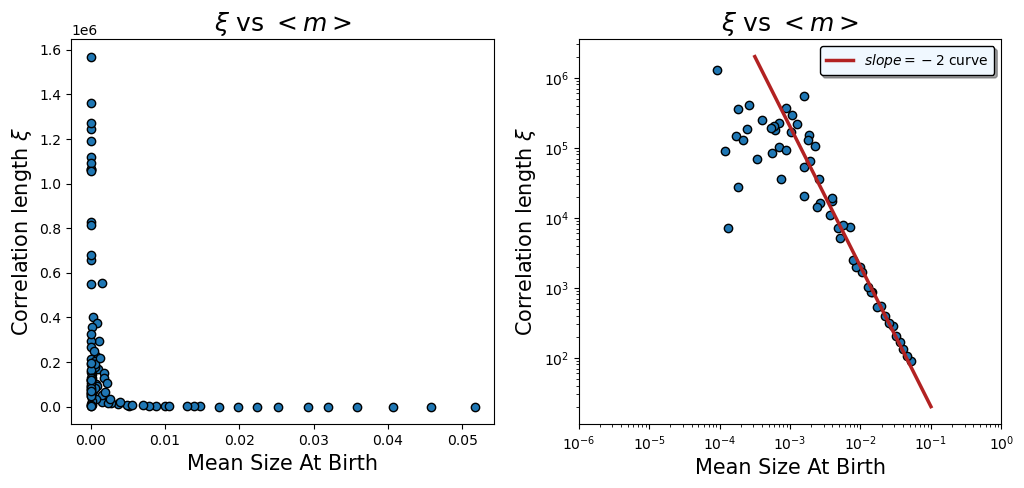

In [24]:
fig, ax_ = plt.subplots(1, 2, figsize=(12, 5))
for ax, scale in zip(ax_.flatten(), ['linear', 'log']):
    ax.scatter(meanSizesAtBirth,
               autoCorrParameters['correlation'], edgecolor='black')
    ax.set_xlabel('Mean Size At Birth', fontsize=15)
    ax.set_ylabel('Correlation length $\\xi$', fontsize=15)
    ax.set_title('$\\xi$ vs $<m>$', fontsize=18)
    ax.set_xscale(scale)
    _ = ax.set_yscale(scale)

xAxis = np.logspace(-1, -3.5)
ax_[1].plot(xAxis, powerLaw(xAxis, .2, -2), color='firebrick',
            linewidth=2.5, label='$slope = -2$ curve')
_ = ax_[1].legend(facecolor='aliceblue', edgecolor='black', shadow=True)
_ = ax_[1].set_xlim(left=1e-6, right=1)

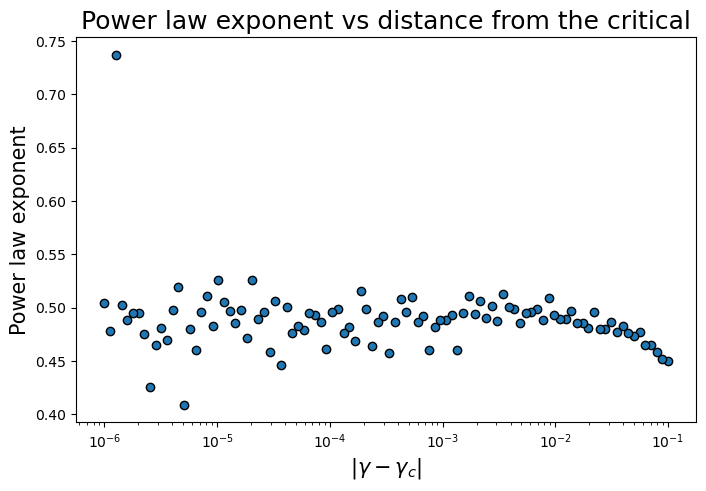

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.scatter(gammaGammaC,
           autoCorrParameters['exponent'], edgecolor='black')
ax.set_xlabel('$|\gamma - \gamma_c|$', fontsize=15)
ax.set_ylabel('Power law exponent', fontsize=15)
ax.set_title('Power law exponent vs distance from the critical', fontsize=18)
_ = ax.set_xscale('log')


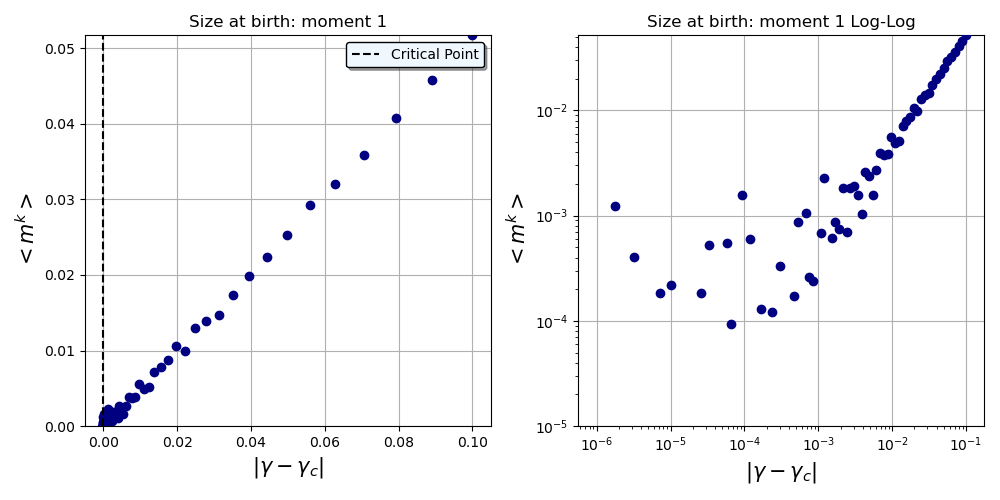

In [14]:
%matplotlib ipympl
allSizes = timeSerieses
fig, ax1 = plt.subplots(1, 2, figsize=(10, 5))
ax, ax_ = ax1.flatten()


#####################################
# Put exp if working with logSizes  #
#####################################


def fY(x, k):
    title1 = f'Size at birth: moment {k}'
    ax.set_title(title1)
    yArr = np.exp(allSizes)**k

    y = np.mean(yArr, axis=1)

    ax.set_ylim(bottom=np.min(y), top=np.max(y))
    return y


controls = iplt.scatter(gammaGammaC, fY, k=[
                        1, 2, 3, 4, 5, 6], color='navy', zorder=2, ax=ax)


xAxis = np.linspace(np.min(gammaGammaC), np.max(gammaGammaC), 100)


ax.axvline(0, color='black', linestyle='--', label='Critical Point', zorder=2)
ax.set_xlabel('$|\gamma - \gamma_c|$', fontsize=15, zorder=2)
ax.set_ylabel('$<m^k>$', fontsize=15)
ax.legend(facecolor='aliceblue', shadow=True,
          edgecolor='black', loc='upper right')

ax.grid(zorder=1)
powerLawValues = {'1': (.5, 1), '2': (0.15, 1), '3': (
    0.1, 1), '4': (0.08, 1), '5': (0.1, 1), '6': (0.1, 1)}


def fY2(x, k):
    title2 = f'Size at birth: moment {k} Log-Log'
    ax_.set_title(title2)
    yArr2 = np.exp(allSizes)**k
    y2 = np.mean(yArr2, axis=1)
    ax_.set_ylim(bottom=1e-5, top=np.max(y2))
    return y2


def fY3(x, k):
    y3 = powerLaw(xAxis, *powerLawValues[str(int(k))])
    return y3


_ = iplt.scatter(gammaGammaC, fY2, controls=controls,
                 color='navy', ax=ax_, zorder=3)


ax_.set_xscale('log')
ax_.set_yscale('log')

ax_.set_xlabel('$|\gamma - \gamma_c|$', fontsize=15)
ax_.set_ylabel('$<m^k>$', fontsize=15)
ax_.grid(zorder=1)


fig.tight_layout()
plt.show()
